In [622]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
pd.options.display.max_rows = 1000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#warning hadle
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

In [623]:
# data reading

data = pd.read_csv('train.csv')

In [624]:
# data shape

data.shape

(1460, 81)

In [625]:
# data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [626]:
# data view
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [627]:
# data description of numerical data

data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

### Missing Value Handle

In [628]:
# missing value percentage for each column and sort it in descending order
# display top 10 features after sort

mis_val = data.isnull().sum()
mis_val_percentage = 100*mis_val/len(data)
missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val.head(10)

Missing Values  % of Total Values
PoolQC                  1453          99.520548
MiscFeature             1406          96.301370
Alley                   1369          93.767123
Fence                   1179          80.753425
FireplaceQu              690          47.260274
LotFrontage              259          17.739726
GarageYrBlt               81           5.547945
GarageCond                81           5.547945
GarageType                81           5.547945
GarageFinish              81           5.547945

#### Note: 
From the above cell we can see top 4 values are having more than 90% missing values, but if we check the data dictionary those are not missing value but having some value. But even if we fill those NA values with the values in data dictionary it wont make sense as 90%+ data will be having same values for all data point. So we will dropping those features in next steps

In [629]:
# dropping top 3 missing value features 

data = data.drop(['PoolQC','Alley','MiscFeature','Fence'], axis = 1)
data.shape

(1460, 77)

In [630]:
# Dealing with missing values in categorical Variables

# for MasVnrType if NA, fill with None, because I checked the MasVnrArea for those where MasVnrType is null, MasVnrArea is also
# null means veneer is not there. 
data['MasVnrType'] = data['MasVnrType'].fillna('None')

# for BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 if NA fill with No Basement
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')

# for FireplaceQu, if NA fill with No Fireplace
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')

# for GarageType, GarageFinish, GarageQual, GarageCond, , if NA fill with No Garage
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')

# for Electrical, if NA fill with mode value
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])


In [631]:
# missing value handle for numerical data

# for MasVnrArea if NA, fill with 0, because almost all records are having MasVnrType as None
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

# for GarageYrBlt, if Na fill with 0. Checked in the data GarageYrBlt is NA only for those records where Garage is not present.
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

# for LotFrontage, if NA fill with median value
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())


In [632]:
# Check for duplicate data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [633]:
# ID is unique value column, so dropping it

data = data.drop(['Id'], axis=1)

In [634]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd      

In [635]:
# checking missing values after imputation

missing_value = pd.DataFrame(data.isnull().sum(), columns=['no. of missing values'])
print('Sum of Missing values in Dataset: ', missing_value['no. of missing values'].sum())

Sum of Missing values in Dataset:  0


In [636]:
data.shape

(1460, 76)

### Numerical Variables Analysis

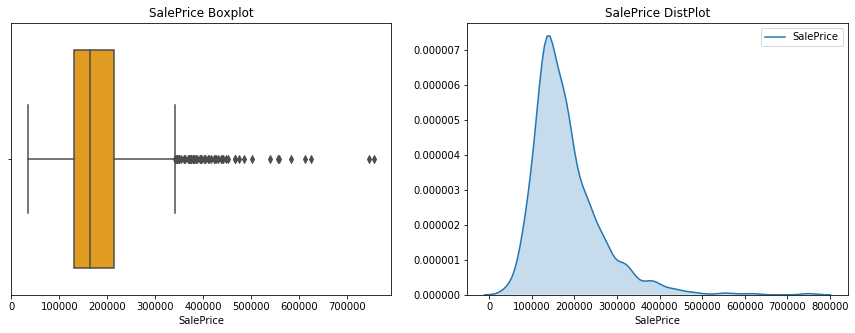

In [637]:
# Target Variable Distribution

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))


sns.boxplot(data['SalePrice'], ax=ax1,color="orange")
ax1.set_title('SalePrice Boxplot')
plt.xlabel('SalePRice')

sns.kdeplot(data['SalePrice'], shade=True, ax=ax2)
plt.xlabel('SalePrice')
ax2.set_title('SalePrice DistPlot')
plt.show()

#### Findings
As we can see from above plot that our target varibale is right skewed so to make it less skewed I am going to perform log transformation on target variable 

In [638]:
# log Transformation of SalePrice
data['SalePrice'] = np.log(data['SalePrice'])

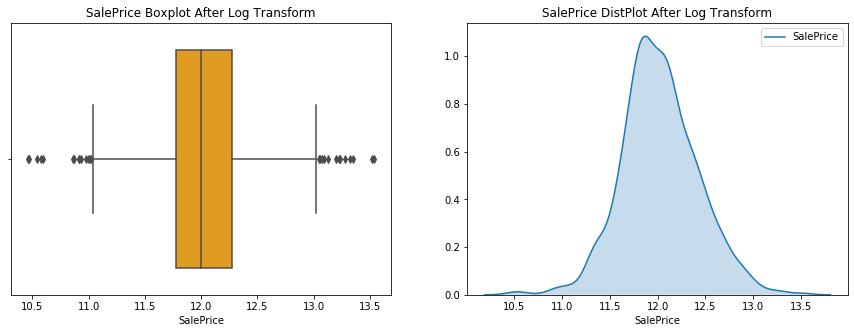

In [639]:
# After Log trasformation checking the distribution of SalePrice

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))


sns.boxplot(data['SalePrice'], ax=ax1,color="orange")
ax1.set_title('SalePrice Boxplot After Log Transform')
plt.xlabel('SalePRice')

sns.kdeplot(data['SalePrice'], shade=True, ax=ax2)
plt.xlabel('SalePrice')
ax2.set_title('SalePrice DistPlot After Log Transform')
plt.show()

#### Findings:
As we can see after log tranformation our target varibale looks less skewed and normally distributed

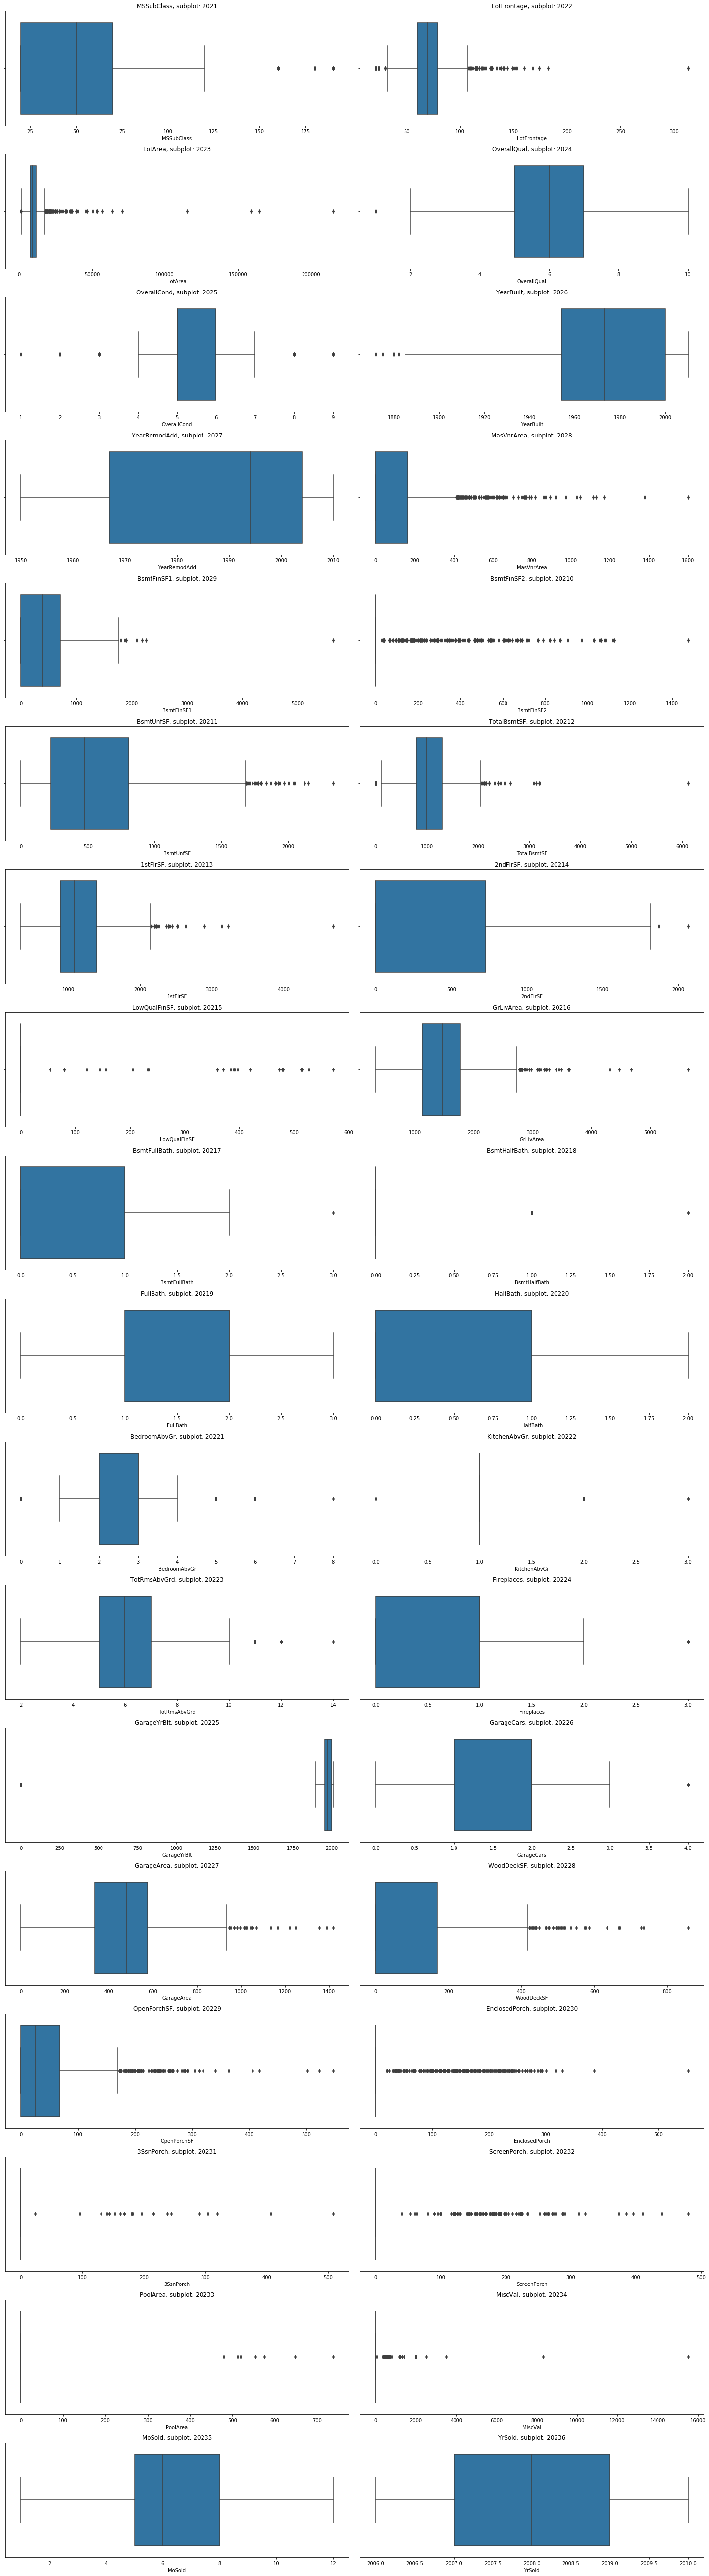

In [640]:
# Outlier Detection

num_cols = data.select_dtypes(include=np.number).columns.tolist()

a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,50))
fig.set_size_inches(20, 80)

for i in num_cols:
    if i == 'SalePrice':
        continue
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

#### Findings:
So many continuos variables are having outliers which we will treating in next steps like LotFrontAge, LotArea, MasVnrArea, PoolArea, 3SnPorch etc... 

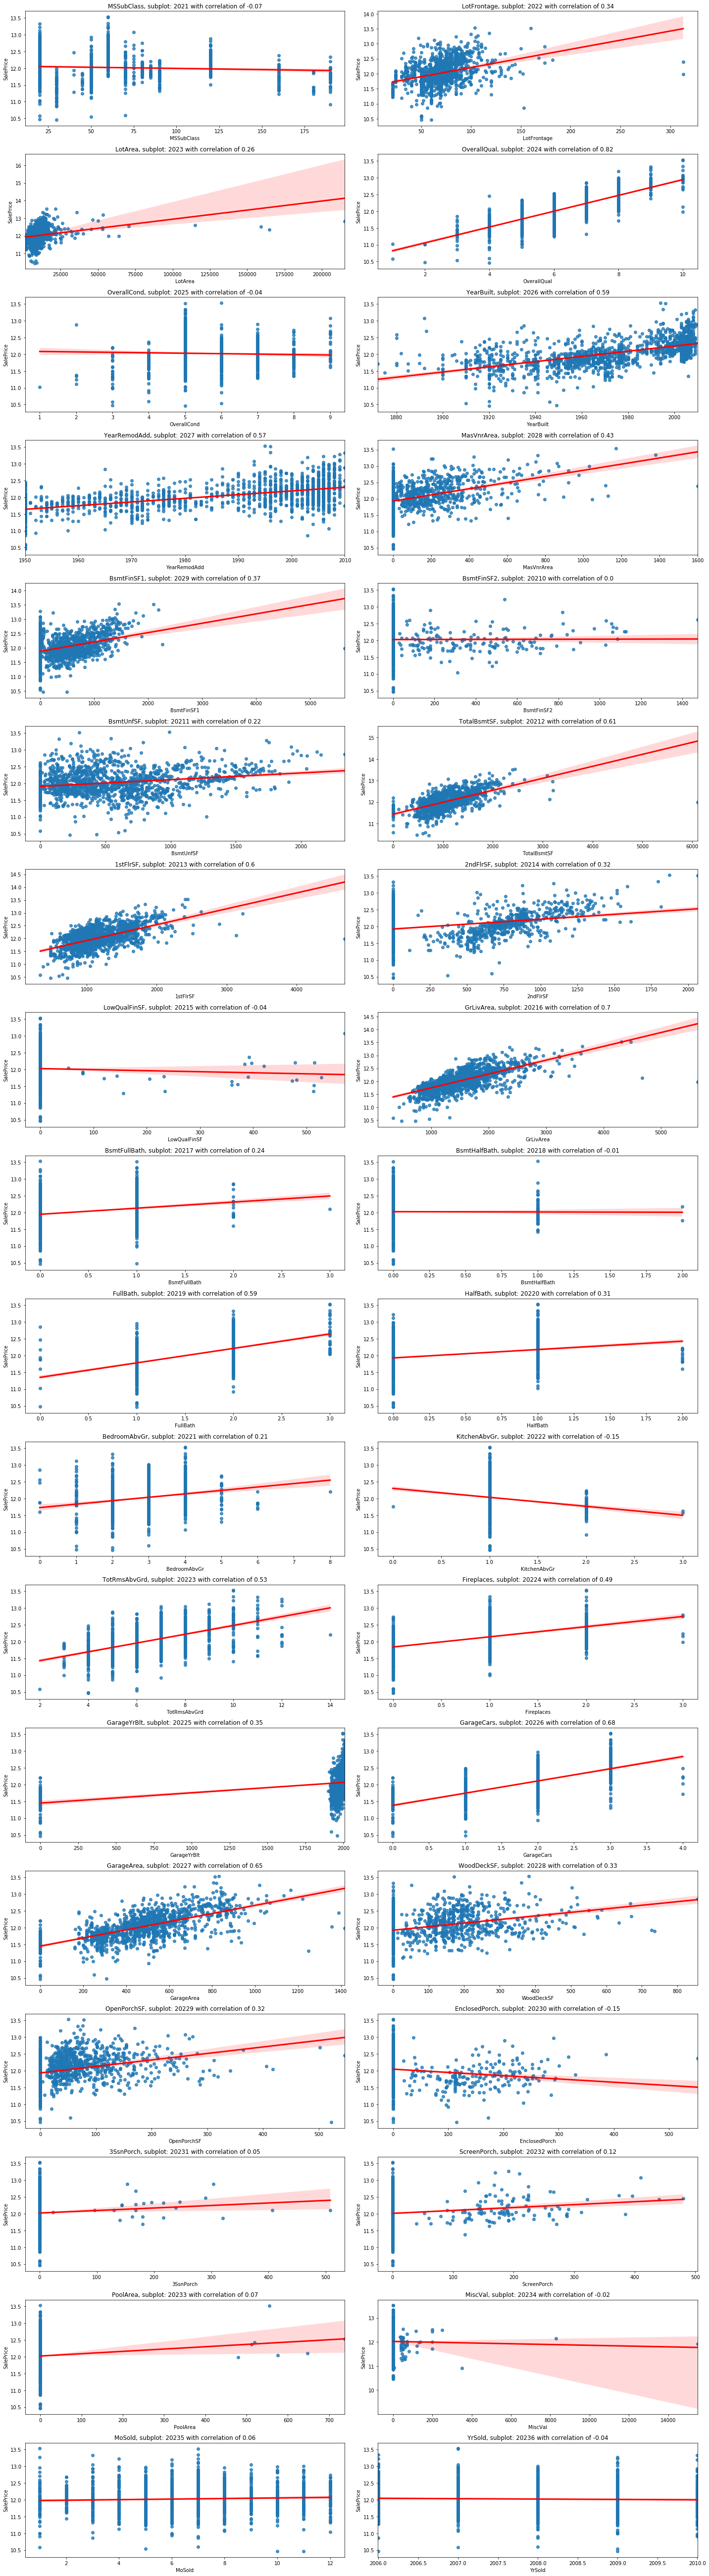

In [641]:
# ############################################################################################################
# checking the relationship of numerical varibales with target variable                                      #
# 1. Plotting reg plot for each numerical variable with taget variable i.e SalePrice                         #
# 2. Title will contain the Name of Feature and the correlation value of that feature with target feature    #
# ############################################################################################################

num_cols = data.select_dtypes(include=np.number).columns.tolist()
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,50))
fig.set_size_inches(20, 80)

for i in num_cols:
    if i == 'SalePrice':
        continue
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{} with correlation of {}'.format(i, a, b, c, 
                                                                  round(data[i].corr(data['SalePrice']), 2)))
    plt.xlabel(i)
    sns.regplot(data[i], data['SalePrice'], line_kws={"color":"r","lw":3})
    c = c + 1

    plt.tight_layout()
plt.show();


#### Findings
1. We can see from the above plot that the distribution of our data is very skewed
2. Lots of variables are having very less or almost no linear relationship with our target variable
3. Few features shows good correlation with target variable

Note: I have added the correlation value of each features with Target feature in the title of respective plot 

In [642]:
#  for right skewed data to make it less skewed and more linear I am going to perform log transformation
# Performing log transformation only for those feature where skewness value is greater than 0.5
# This will be helping in outlier treatment also

from scipy.stats import skew 
skew_in_vars = data[num_cols].iloc[:,:-1].apply(lambda x: skew(x))
skew_in_vars.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -3.865524
dtype: float64

In [643]:
# After performing log Transformation
high_skew = skew_in_vars[abs(skew_in_vars > 0.5) ]
skew_index = high_skew.index
print('Features with more than 0.5 skewness: ',list(skew_index))
for i in skew_index:
    data[i] = np.log1p(data[i])
print(data[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False))

Features with more than 0.5 skewness:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
HalfBath          0.565586
MasVnrArea        0.503014
BsmtFullBath      0.418782
2ndFlrSF          0.289346
MSSubClass        0.248741
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
Fireplaces        0.181896
GarageArea        0.179796
WoodDeckSF        0.153379
SalePrice         0.121210
YrSold            0.096170
1

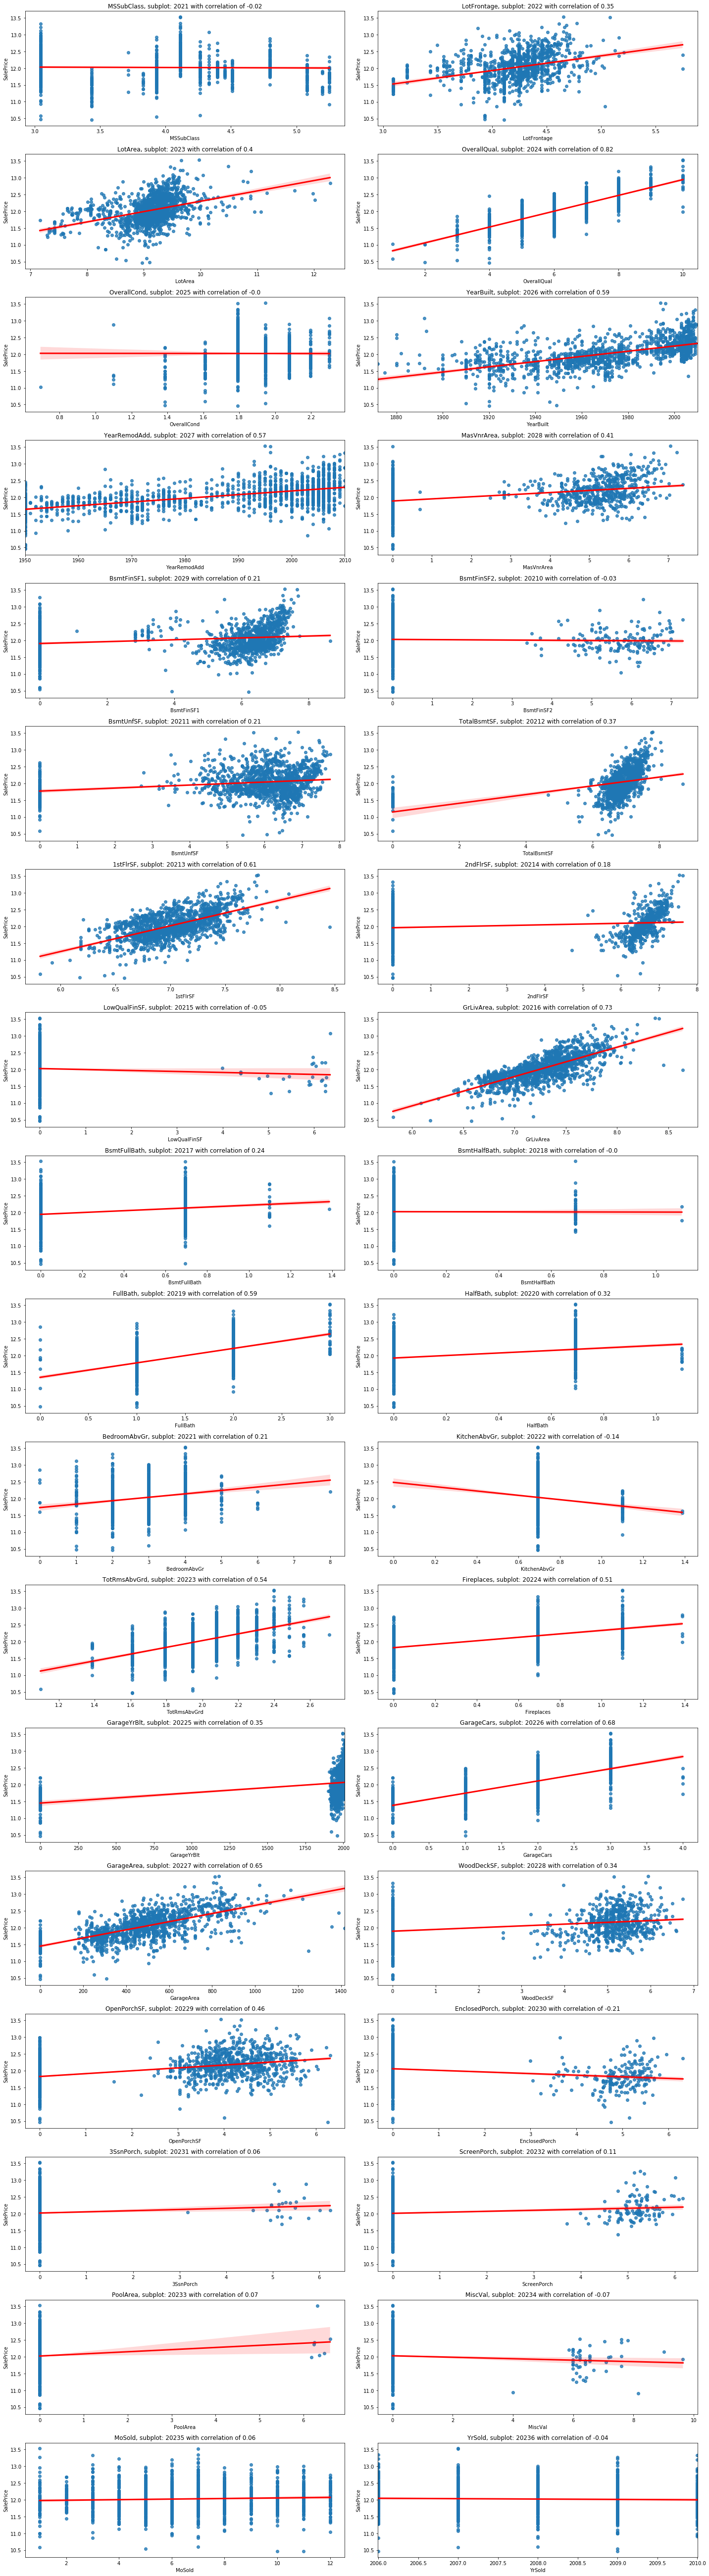

In [644]:
# ############################################################################################################
# checking the relationship of numerical features with target variable After performing log transformation   #
# 1. Plotting regplot plot for each numerical variable with taget variable i.e SalePrice                     #
# 2. Title will contain the Name of Feature and the correlation value of that feature with target feature    #
# ############################################################################################################

a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,50))
fig.set_size_inches(20, 80)

for i in num_cols:
    if i == 'SalePrice':
        continue
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{} with correlation of {}'.format(i, a, b, c, 
                                                                  round(data[i].corr(data['SalePrice']), 2)))
    plt.xlabel(i)
    sns.regplot(data[i], data['SalePrice'],line_kws={"color":"r","lw":3})
    c = c + 1

    plt.tight_layout()
plt.show();


#### Finding

1. Transformed features are somewhat improved in terms of linearity

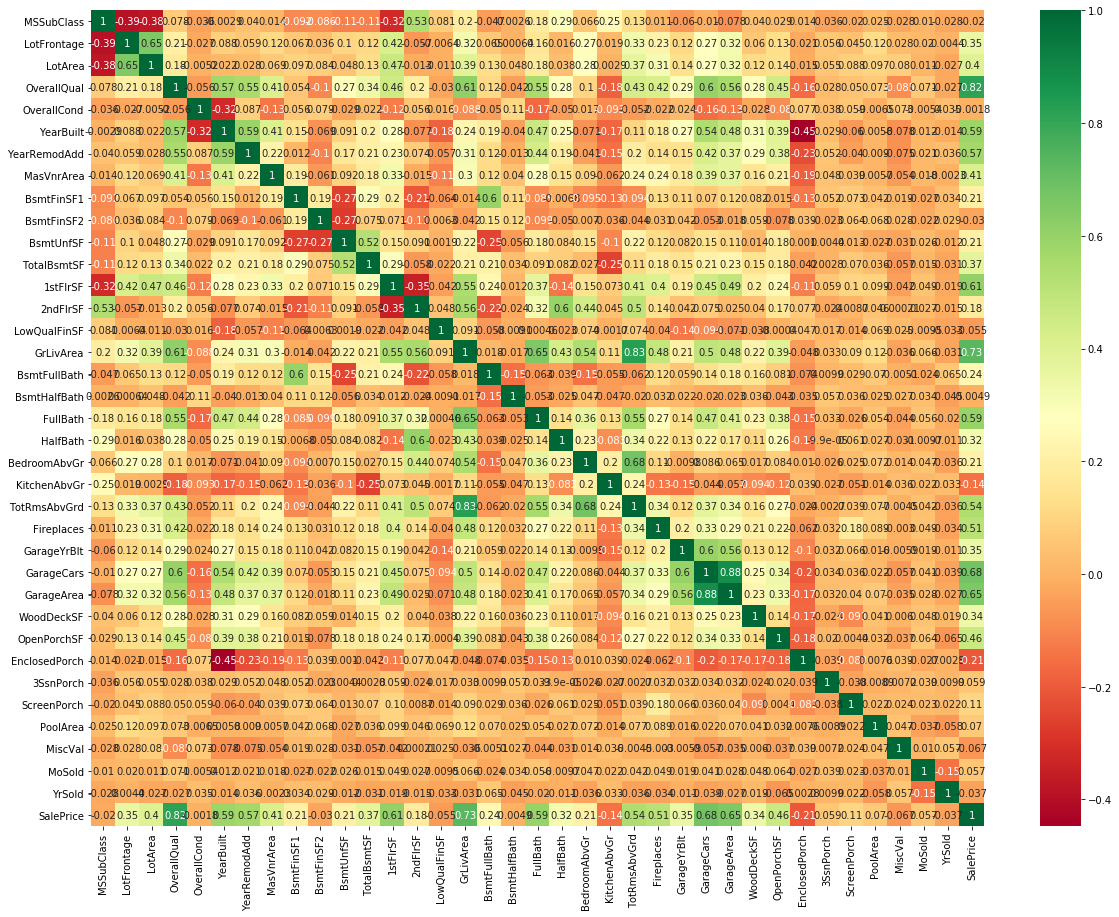

In [645]:
# Plotting correlation matrix of top correlated numerical features with target variable

plt.figure(figsize=(20,15))
sns.heatmap(data[num_cols].corr(),annot=True,cmap="RdYlGn")

### Findings:
We can see from the heatmap that there are some varibales having good correlation with target varibale like: OverallQual, GarageCars, GarageArea, HalfBath, GrLiveArea, etc

### Categorical Feature Analysis

In [646]:
# categorical columns
cat_cols = data.select_dtypes(include=object).columns.tolist()

data[cat_cols].shape

(1460, 39)

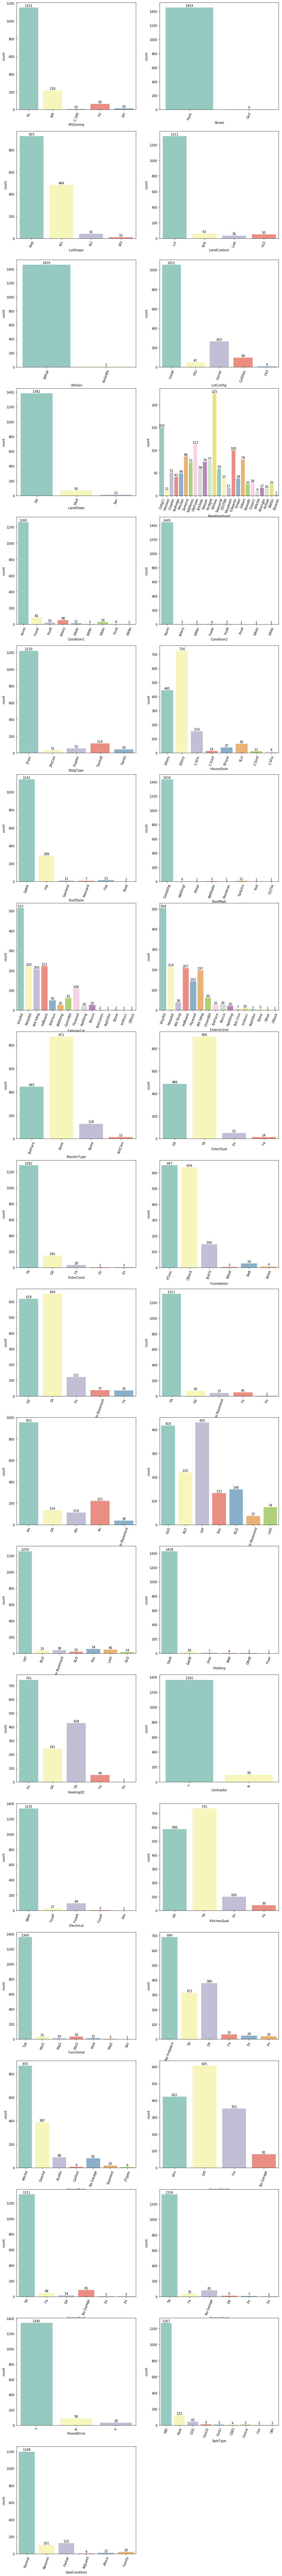

In [647]:
# countplot of categories in a feature

plt.figure(figsize=(15,150))
plotnumber=1
for c in cat_cols:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=data[c],palette='Set3')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

### Findings
1. We can see lots of features having imbalance distribution of categories like MSZoning, Street, Heating, etc...

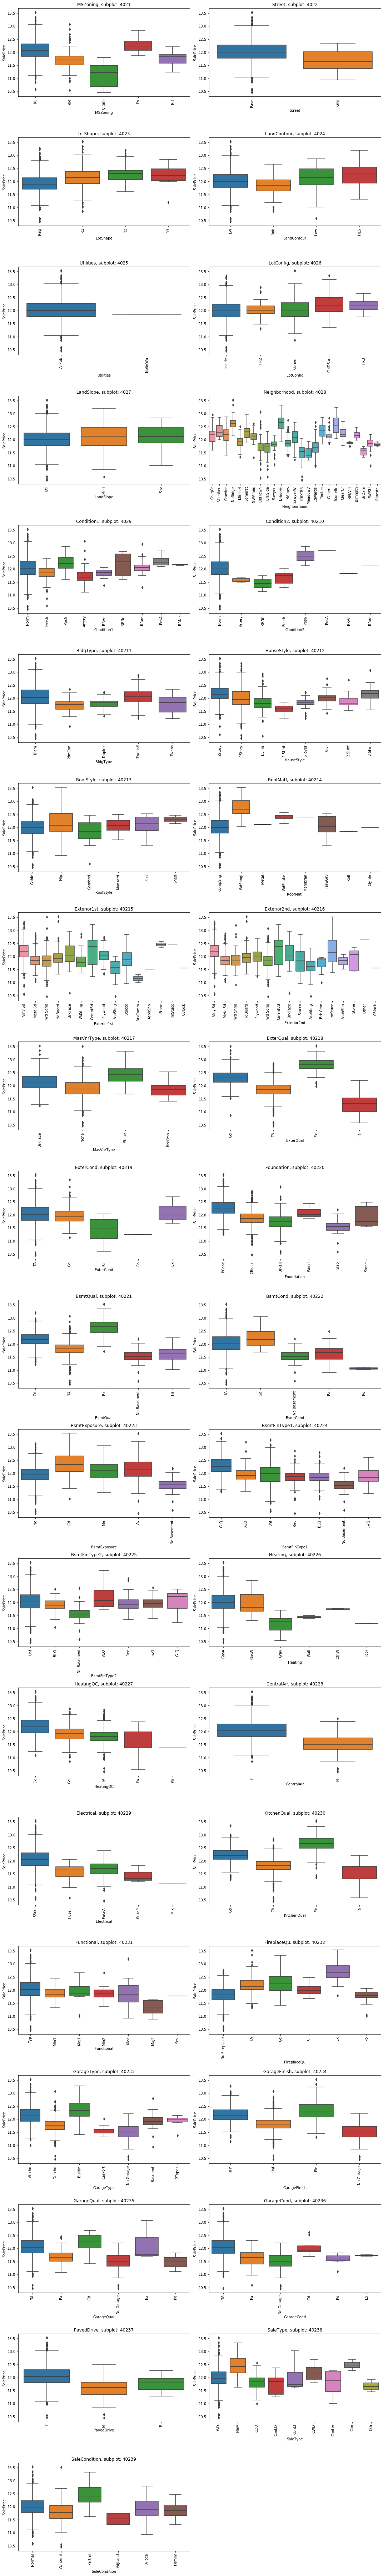

In [648]:
# Plotting boxplot between categorical features and Sales Price

a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,80))
fig.set_size_inches(15, 200)

for i in cat_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data[i], data['SalePrice'])
    plt.xticks(rotation = 90)
    c = c + 1

plt.tight_layout()
plt.show();

In [649]:
# Dummy Encoding

#convert categorical variable into dummy
cat_data = pd.get_dummies(data[cat_cols], drop_first=True)
cat_data.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0  

In [650]:
# shape of categorical data
cat_data.shape

(1460, 210)

In [651]:
# dropping original categories from data and add add dummies
data_1 = data.drop(cat_cols,axis=1)
final_df = pd.concat([cat_data,data_1], axis = 1)

In [652]:
# shape of final dataframe
final_df.shape

(1460, 247)

### Model Building

In [804]:
# train test split

from sklearn.model_selection import train_test_split


y = final_df['SalePrice']
X = final_df.drop(['SalePrice'], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [805]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1022, 246)
X test shape (438, 246)
y train shape (1022,)
y test shape (438,)


In [806]:
# Scaling of numerical features in Training and Testing data

from sklearn.preprocessing import MinMaxScaler

# numerical_cols = data_corr.columns[:-1]
numerical_cols = num_cols[:-1]
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


### Linear Regression Model With all features

In [807]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [808]:
# model training
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [809]:
# prediciting on train data and test data
y_pred_train_lr = lm.predict(X_train)
y_pred_test_lr =  lm.predict(X_test)

In [810]:
# root means square of training and testing data

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lr))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lr))))

Root Mean Square Error train = 0.08400444558129931
Root Mean Square Error test = 1711695116.0212314


#### Findings 
As we can on train data RMSE is very less and on test data is huge. We can say that its overfitting.

In [811]:
# R2 score of training and testing data

print("R-Square for training data",lm.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for test data",lm.score(X_test,y_test))

R-Square for training data 0.951846842917025
R-Square for test data -1.550297922340648e+19


#### Finding
The difference in R2 score is huge. Test R2 score is going in negative means that model is not capturing any pattern and it is so overfitted that it is worse than the basic model

Text(0.5, 0, 'Errors')

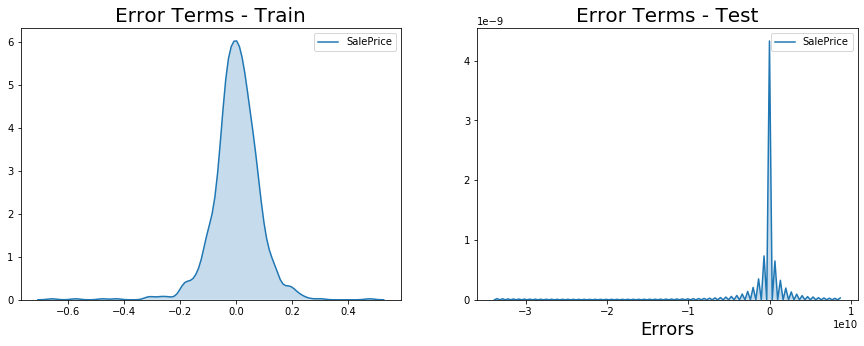

In [812]:
# Plot the histogram of the error terms

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.kdeplot((y_train - y_pred_train_lr), ax=ax1, shade = True)
ax1.set_title('Error Terms - Train', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# test error term
sns.kdeplot((y_test - y_pred_test_lr), ax = ax2, shade = True)
ax2.set_title('Error Terms - Test', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Findings:
Test data error distribution is not normal and having so many spikes

### Model with RFE

In [679]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': [15,20,25,30,35]}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [15, 20, 25, 30, 35]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [680]:
# getting best params of cross validation 
print("The best value of features is: ",model_cv.best_params_,model_cv.best_score_)

The best value of features is:  {'n_features_to_select': 15} 0.3959055470364767


In [681]:
# training RFE model on train data

rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [682]:
# predicting on train and test data

y_pred_train_rfe_gcv = rfe.predict(X_train)
y_pred_test_rfe_gcv =  rfe.predict(X_test)

In [683]:
# RMSE values for train and test data

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_rfe_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_rfe_gcv)))) 

Root Mean Square Error train = 0.14593074336852596
Root Mean Square Error test = 0.19068363070127617


In [684]:
# R2 score for train and test data

print("R-Square for training data",rfe.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for training data",rfe.score(X_test,y_test))

R-Square for training data 0.8546838724802873
R-Square for training data 0.8076070441579526


Text(0.5, 0, 'Errors')

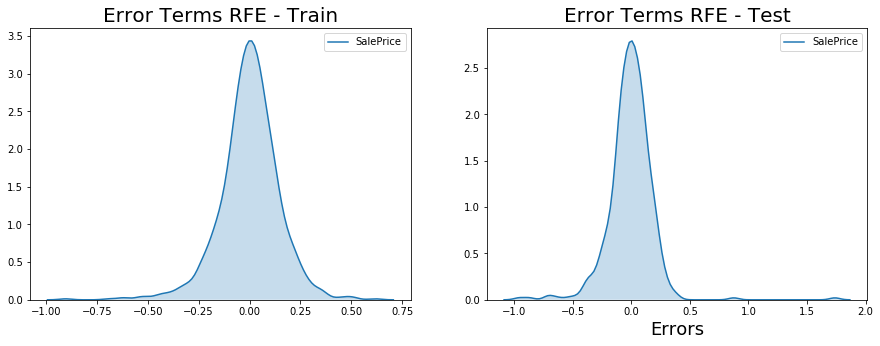

In [685]:
# Plot the histogram of the error terms

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.kdeplot((y_train - y_pred_train_rfe_gcv), ax=ax1, shade = True)
ax1.set_title('Error Terms RFE - Train', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# test error term
sns.kdeplot((y_test - y_pred_test_rfe_gcv), ax = ax2, shade = True)
ax2.set_title('Error Terms RFE - Test', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Findings
We can see the error term is much normal as compare to Linear Regression model

### Model with Ridge

In [813]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


# Cross validation to find best parameters for ridge
lm_ridge=Ridge()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1,2,5,10,20]]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


lm_ridge_grd = GridSearchCV(estimator = lm_ridge, param_grid=parameters, cv=folds, scoring='r2')

lm_ridge_grd.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.7,
                                   0.8, 1, 2, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [814]:
# best params
print("The best value of Alpha is: ",lm_ridge_grd.best_params_,lm_ridge_grd.best_score_)

The best value of Alpha is:  {'alpha': 5} 0.8832420455631622


In [815]:
# printing best params
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [816]:
# training ridge model on train set
lm_ridge_best_gcv.fit(X_train,y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [817]:
# predicitng on train set and test set

y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test)

In [818]:
# RMSE value for train and test data

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_gcv)))) 

Root Mean Square Error train = 0.10429458889501306
Root Mean Square Error test = 0.14542198366647888


In [819]:
# R2 score for train and test set

print("R-Square for training data",lm_ridge_best_gcv.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_ridge_best_gcv.score(X_test,y_test))

R-Square for training data 0.9257760983758252
R-Square for testing data 0.8881019622141497


Text(0.5, 0, 'Errors')

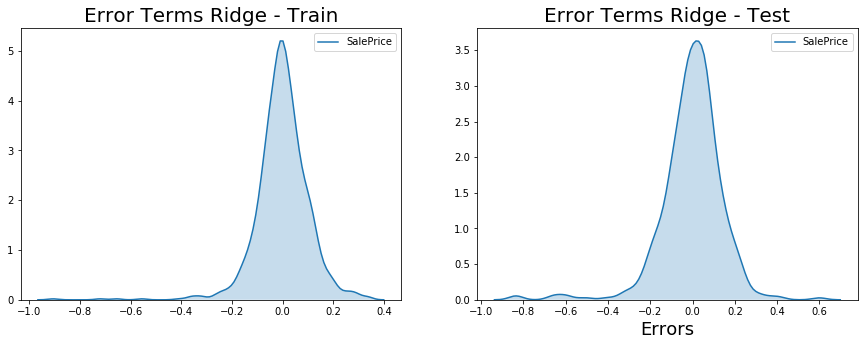

In [820]:
# Plot the histogram of the error terms

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.kdeplot((y_train - y_pred_train_ridge_gcv), ax=ax1, shade = True)
ax1.set_title('Error Terms Ridge - Train', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# test error term
sns.kdeplot((y_test - y_pred_test_ridge_gcv), ax = ax2, shade = True)
ax2.set_title('Error Terms Ridge - Test', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'Predicted value')

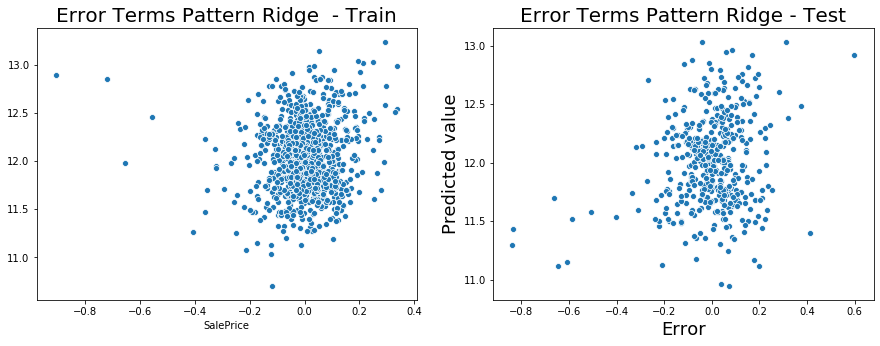

In [821]:
# Plot the scatterplot to check if an y pattern is there in error terms.

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.scatterplot((y_train - y_pred_train_ridge_gcv), y_pred_train_ridge_gcv, ax=ax1)
ax1.set_title('Error Terms Pattern Ridge  - Train', fontsize = 20)          # Plot heading 
plt.xlabel('Error', fontsize = 18)                         # X-label
plt.ylabel('Predicted value', fontsize = 18) # Y-label

# test error term
sns.scatterplot((y_test - y_pred_test_ridge_gcv), y_pred_test_ridge_gcv,  ax = ax2)
ax2.set_title('Error Terms Pattern Ridge - Test', fontsize = 20)          # Plot heading 
plt.xlabel('Error', fontsize = 18)  # X-label
plt.ylabel('Predicted value', fontsize = 18) # Y-label

#### Findings 

There is no pattern in the error.

### Model With Lasso

In [822]:
from sklearn.linear_model import Lasso

In [823]:
# finding best lambda value using cross validation

lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

lm_lasso_grd = GridSearchCV(estimator=lm_lasso, param_grid=parameters, cv=folds, scoring='r2')

lm_lasso_grd.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.7,
                                   0.8, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [824]:
# best params

print("The best value of Alpha is: ",lm_lasso_grd.best_params_,lm_lasso_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.8908063704287729


In [825]:
# printing best params

lm_lasso_best_gcv = lm_lasso_grd.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [826]:
# traning Lasso model using train data and with params

lm_lasso_best_gcv.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [827]:
# predicting on train and test data

y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train)
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test)

In [828]:
# RMSE values for train and test data

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_gcv)))) 

Root Mean Square Error train = 0.11393308774671904
Root Mean Square Error test = 0.14150783424647898


In [829]:
# R2 scores for train and test data

print("R-Square for training data",lm_lasso_best_gcv.score(X_train,y_train)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for training data",lm_lasso_best_gcv.score(X_test,y_test))

R-Square for training data 0.9114232051059425
R-Square for training data 0.8940445475272306


Text(0.5, 0, 'Errors')

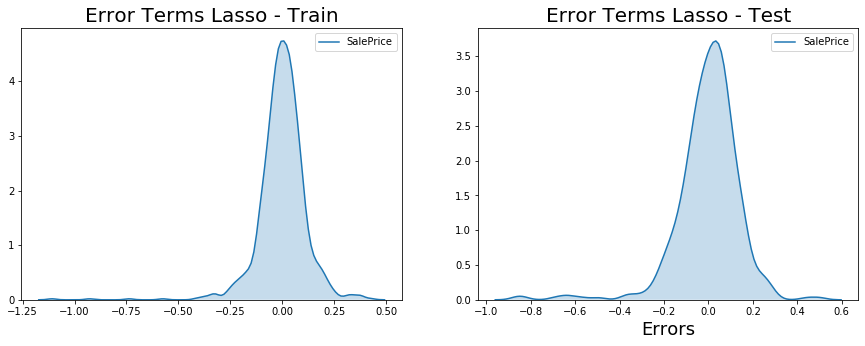

In [830]:
# Plot the histogram of the error terms

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.kdeplot((y_train - y_pred_train_lasso_gcv), ax=ax1, shade = True)
ax1.set_title('Error Terms Lasso - Train', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# test error term
sns.kdeplot((y_test - y_pred_test_lasso_gcv), ax = ax2, shade = True)
ax2.set_title('Error Terms Lasso - Test', fontsize = 20)          # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'Predicted value')

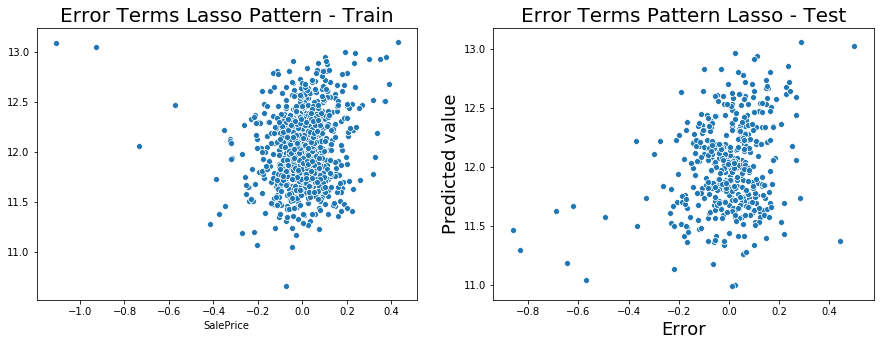

In [831]:
# Plot the scatterplot to check if an y pattern is there in error terms.

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

# train error term
sns.scatterplot((y_train - y_pred_train_lasso_gcv), y_pred_train_lasso_gcv, ax=ax1)
ax1.set_title('Error Terms Lasso Pattern - Train', fontsize = 20)          # Plot heading 
plt.xlabel('Error', fontsize = 18)                         # X-label
plt.ylabel('Predicted value', fontsize = 18) # Y-label

# test error term
sns.scatterplot((y_test - y_pred_test_lasso_gcv), y_pred_test_lasso_gcv,  ax = ax2)
ax2.set_title('Error Terms Pattern Lasso - Test', fontsize = 20)          # Plot heading 
plt.xlabel('Error', fontsize = 18)  # X-label
plt.ylabel('Predicted value', fontsize = 18) # Y-label

#### Findings 

There is no pattern in the error.

In [833]:
# all 4 model comparison dictionary

Model_Comparision = {'Model Name': ['Linear Regression with all feature', 'RFE with Cross Validation', 'Ridge with Cross Validation','Lasso with Cross Validation'],
             'Train R2 Score':[lm.score(X_train,y_train), rfe.score(X_train,y_train),lm_ridge_best_gcv.score(X_train,y_train),lm_lasso_best_gcv.score(X_train,y_train)],
             'Test R2 Score': [lm.score(X_test,y_test),rfe.score(X_test,y_test),lm_ridge_best_gcv.score(X_test,y_test),lm_lasso_best_gcv.score(X_test,y_test)],
            'Train RMSE Value': [np.sqrt(mean_squared_error(y_train, y_pred_train_lr)), np.sqrt(mean_squared_error(y_train, y_pred_train_rfe_gcv)), np.sqrt(mean_squared_error(y_train, y_pred_train_ridge_gcv)), np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_gcv))],
            'Test RMSE Value': [np.sqrt(mean_squared_error(y_test, y_pred_test_lr)), np.sqrt(mean_squared_error(y_test, y_pred_test_rfe_gcv)), np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_gcv)), np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_gcv))]}

In [834]:
# comparison Dataframe from dict
Model_Comparision_Df = pd.DataFrame(Model_Comparision)

In [835]:
Model_Comparision_Df

Model Name  Train R2 Score  Test R2 Score  \
0  Linear Regression with all feature        0.951847  -1.550298e+19   
1           RFE with Cross Validation        0.854684   8.076070e-01   
2         Ridge with Cross Validation        0.925776   8.881020e-01   
3         Lasso with Cross Validation        0.911423   8.940445e-01   

   Train RMSE Value  Test RMSE Value  
0          0.084004     1.711695e+09  
1          0.145931     1.906836e-01  
2          0.104295     1.454220e-01  
3          0.113933     1.415078e-01

### Approach Explaination

#### EDA Findings:
1. Data is having both numeric and categorical data
2. Size of data is 1460 datapoints
3. Checked missing values percentage in whole data and dropped those features where missing values is greater than 80%. 
4. Numeric data is having lots of outlier and very skewed. To introduce some linearity I did log transformation which will de-emphasize on outliers also.
5. I plotted correlation heatmap of all the numeric variable. We can see that some numeric features are not having strong relationship with target varibale.
6. For categorical data, firstly I checked the distribution of categories in the respective features. We saw some features are having 95%+ of data belonging to one category.
7. We have seen the data distribution of categorical varibale with target varibale using boxplot.

#### Why I have not performed feature selection in EDA?
We have seen that in numeric varibale some varibales are having lots of 0 or some varibales are having very low correlation with target varibale. Similarly in categorical varibale we have seen some varibales are having 95%+ times one category. 
Why I have not dropped those features because I want Lasso and Ridge or RFE to perform this operation. If any feature is not important they will make the coefficient 0 or very close to 0 in case of ridge. And I think that's what we have to perform in this assignment.

#### Model Explaination
1. As we can see linear regression model with all feature is getting overfitted. Train R2 score and RMSE value is good but when it coming to test its performing very bad. Error terms are not normally distributed on test data.
2. In RFE, we used cross validation to find best params in this case number of features. We got 15 as best param. Trained the model and we can see that its performing very good compare to linear regression. But RMSE value is still high in RFE. 
3. In Ridge, we used all the features and performed cross validation to get best lambda value. Trained model using best params and we can see its performing good in terms of R2 score and RMSE value than RFE model. Error terms are also normally distributed and we dont see any pattern in errors also.
4. In Lasso, again we used all the features and performed cross validation to get best lambda value. Trained model using best params and we can see that the difference in R2 score and RMSE of train and test is reduced as compare to Ridge. Error terms are also normally distributed and we dont see any pattern in errors also. 

<b> Best Model</b>
Lasso is performing best so far in terms of R2 score and RMSE value. 

#### Next Steps 
1. As part of next step we can check the multicollinear feature in lasso model and we can remove those also to make it more interpretable.
2. Check the p-value of of all the coefficient to confirm if those coefficient values are reliable or not.


In [836]:
# Top 5 important features in Lasso

importance_lasso = lm_lasso_best_gcv.coef_
importance_df_lasso = pd.DataFrame({'features':X_train.columns,'weight':importance_lasso})
importance_df_lasso.sort_values(by='weight', ascending=False ).head()

features    weight
225    GrLivArea  0.953665
213  OverallQual  0.494482
235   GarageCars  0.252457
214  OverallCond  0.221164
212      LotArea  0.219017

In [837]:
# Top 5 important features in Ridge

importance_ridge = lm_ridge_best_gcv.coef_
importance_df_ridge = pd.DataFrame({'features':X_train.columns,'weight':importance_ridge})
importance_df_ridge.sort_values(by='weight', ascending=False ).head()

features    weight
225    GrLivArea  0.297756
213  OverallQual  0.290940
222     1stFlrSF  0.261136
214  OverallCond  0.182610
235   GarageCars  0.171637